# DELHI AIR QUALITY ANALYSIS 

##### BY:- YAJUSH MISHRA
###### 02-03-2018

<ol type="1">
    <li> Data preparation, NA values
    <ul>
        <li>Importing Data </li>
        <li>Calculating Aqi </li>
        <li>Merging Data </li>
    </ul>
    <li> Data Visualisation</li>
    <li> Creating Models
    <ul>
        <li>Predictions</li>
        <li>Model Evaluation</li>
    </ul>
    <li>Conclusions
</ol>

In [2]:
###load packages and csv file
import pandas as pd
import aqi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



## 1. Data Preparation
     

####             1.1 Importing and processing air quality data
* Importing 

In [15]:
## data is now processed and is ready for further estimation
df1=pd.read_json('https://data.gov.in/node/1144121/datastore/export/json')
df2=pd.read_json('https://data.gov.in/node/1144101/datastore/export/json')
df3=pd.read_json('https://data.gov.in/node/2927501/datastore/export/json')
df=pd.concat([df2,df1])
df=df[[2,4,1,7,8,9,10]]
df.columns=df3.iloc[0]
df=df.iloc[1:]
df3.columns=df3.iloc[0]
df3=df3.iloc[1:]
df3.head()
df=pd.concat([df,df3])
df.to_csv('air_processed_data.csv', sep=',', encoding='utf-8')
df.head()
## data is now processed and is ready for further estimation
##saving data

,State/City,Location,DATE,SO2,NO2,PM10,PM2.5
1,Delhi,"Pritampura, Delhi",01-01-14,4,40,154,NA
2,Delhi,"Pritampura, Delhi",01-06-14,4,41,232,NA
3,Delhi,"Pritampura, Delhi",01-09-14,4,44,402,NA
4,Delhi,"Pritampura, Delhi",15-01-14,4,46,291,NA
5,Delhi,"Pritampura, Delhi",20-01-14,4,41,289,NA


The data used for analysis is of year 2014-2016,this data is taken from data.gov.in website

#### 1.2 Calculating aqi index values using alogrithm by EPA

In [4]:
#now importing processed data file
df=pd.read_csv('air_processed_data_new.csv')

###### Calculating aqi

In [5]:
#print([i for i in df[['SO2','NO2','PM10']].values])
df['DATE'] =pd.to_datetime(df.DATE)
aqi_values=[int(aqi.to_aqi([(aqi.POLLUTANT_PM10,int(i[2])),(aqi.POLLUTANT_NO2_1H,int(i[1])),(aqi.POLLUTANT_SO2_1H,int(i[0])),(aqi.POLLUTANT_PM25,int(i[3]))],algo=aqi.ALGO_EPA )) for i in df[['SO2','NO2','PM10','PM2.5']].values]
df['aqi']=aqi_values
df.sort_values('DATE')
df.head()
#data after calculating aqi

,State/City,Location,DATE,SO2,NO2,PM10,PM2.5,aqi
0,Delhi,"Pritampura, Delhi",2014-01-01,4,40,154,0,100
1,Delhi,"Pritampura, Delhi",2014-01-06,4,41,232,0,139
2,Delhi,"Pritampura, Delhi",2014-01-09,4,44,402,0,268
3,Delhi,"Pritampura, Delhi",2014-01-15,4,46,291,0,169
4,Delhi,"Pritampura, Delhi",2014-01-20,4,41,289,0,168


#### Importing and processing weather data 

In [123]:
wf=pd.read_csv('weather.csv')
wf['DATE'] =pd.to_datetime(wf.DATE).dt.date
wf.sort_values('DATE',ascending=True,inplace=True)
wf.reindex()
wf.head()

,DATE,T,Po,P,Pa,U
8698,2014-01-01,13.6,746.8,765.8,-0.3,97
8696,2014-01-01,11.8,747.5,766.6,1.2,100
8695,2014-01-01,15.6,748.2,767.1,0.7,89
8694,2014-01-01,17.6,746.4,765.1,-1.8,78
8693,2014-01-01,15.6,745.8,764.7,-0.6,87


### 1.3 Merging Data 
##### This python script merges the data and saves in a new file

In [12]:
%run -i 'select_data_to_merge.py'

In [196]:
df=pd.read_csv('data_merged.csv')
#df.set_index('DATE', inplace=True)
df.head()
## this is merged data

,State/City,Location,DATE,SO2,NO2,PM10,PM2.5,aqi,T,Po,P,Pa,U
0,Delhi,"Pritampura, Delhi",2014-01-01,4,40,154,0,100,13.6,746.8,765.8,-0.3,97
1,Delhi,"Nizamuddin, Delhi",2014-01-01,4,40,212,0,129,13.6,746.8,765.8,-0.3,97
2,Delhi,"Pritampura, Delhi",2014-01-06,4,41,232,0,139,26.2,735.2,753.1,2.6,72
3,Delhi,"Nizamuddin, Delhi",2014-01-06,4,40,190,0,118,26.2,735.2,753.1,2.6,72
4,Delhi,"Pritampura, Delhi",2014-01-09,4,44,402,0,268,0.0,744.0,751.3,0.0,0


##  2. Data Visualization

Text(0.5,0,'Months')

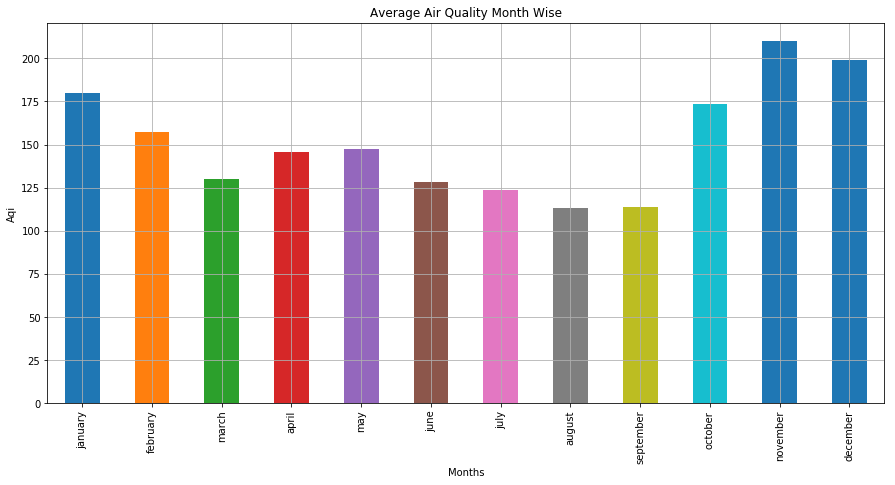

In [197]:
%matplotlib inline
def getMonth(s):
  return s.split("-")[1]
df['month']= df['DATE'].apply(lambda x: getMonth(x))
def getYear(s):
  return s.split("-")[0]
df['year']= df['DATE'].apply(lambda x: getYear(x))
kf=df.groupby(['month'])
kf=kf.mean()
listval=['january','february','march','april','may','june','july','august','september','october','november','december']
kf.index=listval
ax=kf['aqi'].plot(kind="bar",figsize=(15,7),grid=True,title="Average Air Quality Month Wise",use_index=True,legend=False)
ax.set_ylabel("Aqi")
ax.set_xlabel("Months")

This graph shows that average aqi is higher in winter seasons of November and December.This rise in aqi can be attributed to crop residue burning and as well as low wind speed during these months. 

Text(0,0.5,'Aqi')

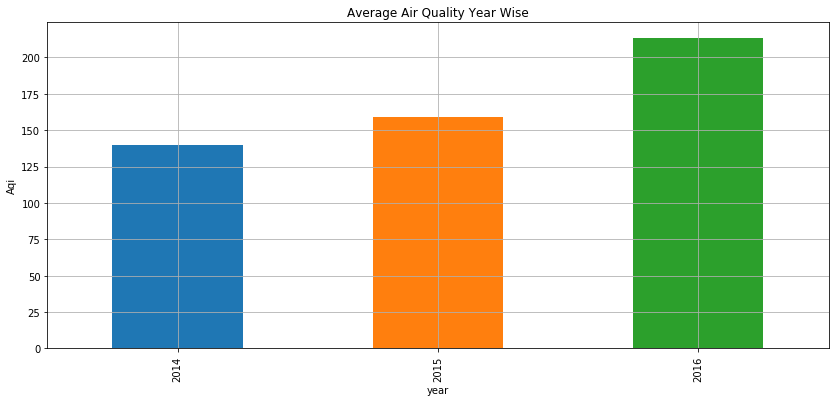

In [198]:
lf=df.groupby(['year']).mean()
ax=lf['aqi'].plot(kind='bar',figsize=(14,6),grid=True,title="Average Air Quality Year Wise",use_index=True,legend=False)
ax.set_ylabel("Aqi")

As shown in the above graph the average air quality of 2016 was very high as compared to previous years.

Text(0,0.5,'Aqi')

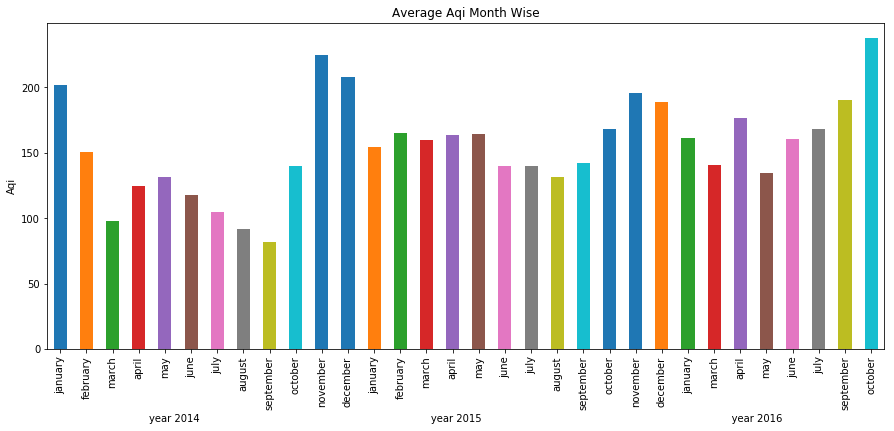

In [199]:
jf=df.groupby(['year','month']).mean()
listval=['january','february','march','april','may','june','july','august','september','october','november','december','january','february','march','april','may','june','july','august','september','october','november','december','january','march','april','may','june','july','september','october']
jf.index=listval
ax=jf['aqi'].plot(x='year',kind='bar',figsize=(15,6),title='Average Aqi Month Wise')
ax.set_xlabel("year 2014                                                                          year 2015                                                                                year 2016")
ax.set_ylabel("Aqi")

This graph shows average aqi month wise over years.

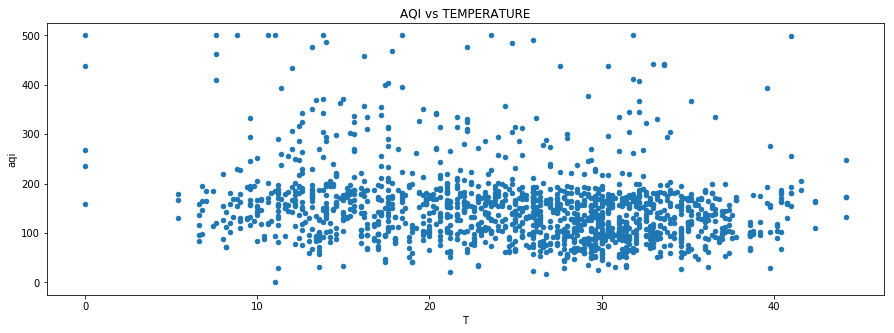

In [200]:
df.plot(x='T',y='aqi',kind='scatter',figsize=(15,5),title="AQI vs TEMPERATURE",legend=True)

Scatter graph of aqi versus the temprature let us visualize how much it aqi deviates.

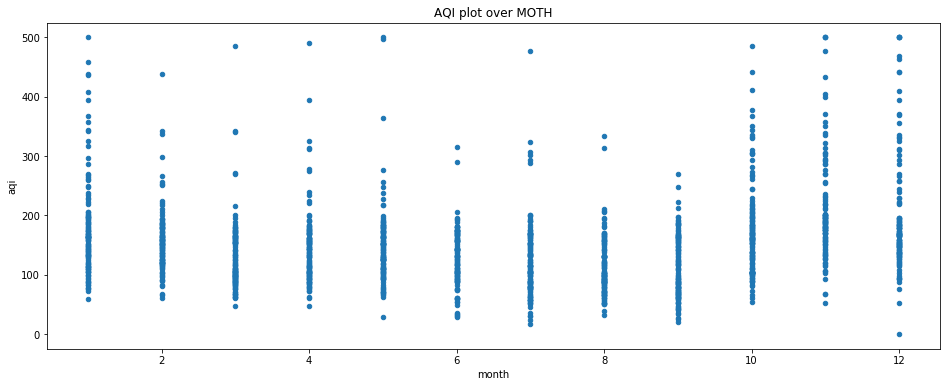

In [203]:
df['month'] = df['month'].apply(pd.to_numeric)
df.plot(x='month',y='aqi',figsize=(16,6),use_index=True,kind='scatter',legend=True,title="AQI plot over MOTH")

Scatter graph of aqi over month 

## 3. Creating Model to predict air quality

 ###   Correlation Chart

In [122]:
df.corr(method='pearson', min_periods=1)

,SO2,NO2,PM10,PM2.5,aqi,T,Po,P,Pa,U,month
SO2,1.000000,0.475103,0.184400,-0.126112,0.135903,-0.117442,0.033768,0.040119,0.020958,0.036105,-0.016684
NO2,0.475103,1.000000,0.357908,-0.268020,0.290300,-0.182320,0.024129,0.037788,0.018222,0.009554,0.103767
PM10,0.184400,0.357908,1.000000,0.120394,0.898631,-0.249425,0.074569,0.090393,0.012017,-0.013655,0.106433
PM2.5,-0.126112,-0.268020,0.120394,1.000000,0.326136,0.042689,0.012926,0.007516,-0.027043,-0.045059,0.038708
aqi,0.135903,0.290300,0.898631,0.326136,1.000000,-0.213258,0.060212,0.068750,0.011573,-0.025687,0.110475
T,-0.117442,-0.182320,-0.249425,0.042689,-0.213258,1.000000,-0.087029,-0.145159,-0.215880,-0.665794,0.022948
Po,0.033768,0.024129,0.074569,0.012926,0.060212,-0.087029,1.000000,0.894964,0.023413,0.034238,-0.032088
P,0.040119,0.037788,0.090393,0.007516,0.068750,-0.145159,0.894964,1.000000,0.028188,0.007997,-0.051568
Pa,0.020958,0.018222,0.012017,-0.027043,0.011573,-0.215880,0.023413,0.028188,1.000000,0.293983,-0.015816
U,0.036105,0.009554,-0.013655,-0.045059,-0.025687,-0.665794,0.034238,0.007997,0.293983,1.000000,-0.035513


The correlation chart shows correlation coefficient between various features,Interestingly the coefficient of correlation between T and aqi is -ve showcasing that if temprature drops aqi increases and viceversa.

In [238]:
def getSeason(x):
    if x in range(1,4):
        return 0
    elif x in range(4,6):
        return 1
    elif x in range(6,9):
        return 2
    else:
        return 3
df['season']=df['month'].apply(lambda x:getSeason(x))
df


,State/City,Location,DATE,SO2,NO2,PM10,PM2.5,aqi,T,Po,P,Pa,U,month,year,season
0,Delhi,"Pritampura, Delhi",2014-01-01,4,40,154,0,100,13.6,746.8,765.8,-0.3,97,1,2014,0
1,Delhi,"Nizamuddin, Delhi",2014-01-01,4,40,212,0,129,13.6,746.8,765.8,-0.3,97,1,2014,0
2,Delhi,"Pritampura, Delhi",2014-01-06,4,41,232,0,139,26.2,735.2,753.1,2.6,72,1,2014,0
3,Delhi,"Nizamuddin, Delhi",2014-01-06,4,40,190,0,118,26.2,735.2,753.1,2.6,72,1,2014,0
4,Delhi,"Pritampura, Delhi",2014-01-09,4,44,402,0,268,0.0,744.0,751.3,0.0,0,1,2014,0
5,Delhi,"Nizamuddin, Delhi",2014-01-09,4,67,379,0,235,0.0,744.0,751.3,0.0,0,1,2014,0
6,Delhi,"Mayapuri Industrial Area, Delhi",2014-01-09,18,100,604,0,500,0.0,744.0,751.3,0.0,0,1,2014,0
7,Delhi,"Town Hall, Ayurvedic Dispensary, Chandni Chowk...",2014-01-09,14,106,541,0,437,0.0,744.0,751.3,0.0,0,1,2014,0
8,Delhi,"Pritampura, Delhi",2014-01-15,4,46,291,0,169,11.4,746.0,765.1,1.4,100,1,2014,0
9,Delhi,"Nizamuddin, Delhi",2014-01-15,5,60,380,0,237,11.4,746.0,765.1,1.4,100,1,2014,0


### 3.1 Predictions and Model Evaluations
#### Using Machine learning to create Models



###### - KNN Model

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(df[['T','season','year','P','U']].values,df['aqi'].values,random_state=0)
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
#print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.01


Accuracy for this model is relatively low as this is having about 1% accuracy rate which is very low.

######  - KNN Regression Model

In [301]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(reg.score(X_test, y_test)))


Test set accuracy: -0.30


Kneighbor regressor model also fails to fit the data and make accurate predictions.

###### -Linear Regression Model

In [300]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df[['T','month','P']].values,df['aqi'].values,random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("Test set score accuracy: {:.2f}".format(lr.score(X_train, y_train)))


Test set score accuracy: 0.07


Linear regression model is having accuracy rate of 7% which is not sufficient enough.

###### -Ridge Model

In [302]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.07
Test set score: 0.03


Ridge regression model also fails.

## 4.Conclusion

##### The following conclusions are made after data analysis 

* This aqi has increased over the years,this means that the air quality has droped significantly in the year (2014-2016).
* The maximum aqi was in the month of november where aqi ranged between (200-300) average.
* No model was effective in predicting the aqi because of limited data,To effectively model we need more data. 